# Import Python Libraries

In [ ]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#detect the percentage of each cancer
from sklearn.linear_model import LogisticRegression


# Read Data

In [ ]:
# first upload the needed data in this notebook's folder

df=pd.read_csv("/content/Cancer_Data_for_NN/cancer_gene_expression.csv")

# Data Exploration & Cleaning

In [ ]:
# check how many rows and coloumns are there

print(df.shape)

(801, 8001)


In [ ]:
#check only first five rows with all coloumn to guess the data

df.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [ ]:
# check the name of the last column of this dataframe
# and to view that coloumn's data use "print" function

df.columns[-1]

'Cancer_Type'

In [ ]:
# check the missing values

datanul = df.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
#let's check how many different cancer types are there in the data

print(df['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


# Data Preprocessing


This is done to put the data in an appropriate format before modelling. #we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

In [ ]:
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]

NameError: name 'df' is not defined

In [ ]:
#let's encode target labels (y) with values between 0 and n_classes-1.

label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

In [ ]:
#split data into training,validation and test sets

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
# Scale the data between 0-1
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.transform(X_val)
X_test=min_max_scaler.transform(X_test)

# Build the Neural Network Model

In [ ]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
#fit the model to the training data

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 2s 38ms/step - loss: 1.5644 - sparse_categorical_accuracy: 0.4004 - val_loss: 1.4095 - val_sparse_categorical_accuracy: 0.4766
Epoch 2/200
16/16 [==============================] - 0s 16ms/step - loss: 1.0518 - sparse_categorical_accuracy: 0.6211 - val_loss: 0.8555 - val_sparse_categorical_accuracy: 0.7891
Epoch 3/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6303 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.5778 - val_sparse_categorical_accuracy: 0.9688
Epoch 4/200
16/16 [==============================] - 0s 15ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.3708 - val_sparse_categorical_accuracy: 0.9844
Epoch 5/200
16/16 [==============================] - 0s 15ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.2379 - val_sparse_categorical_accuracy: 0.9922
Epoch 6/200
16/16 [==============================] - 0s 10ms/step - loss: 0.1606 - sparse_categorica

In [ ]:
predictions = model.predict(X_test)

accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 [==============================] - 0s 3ms/step


In [ ]:
#get the predictions for the first 20 samples in the test set

for index,entry in enumerate(predictions[0:10,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:4 ,actual:4


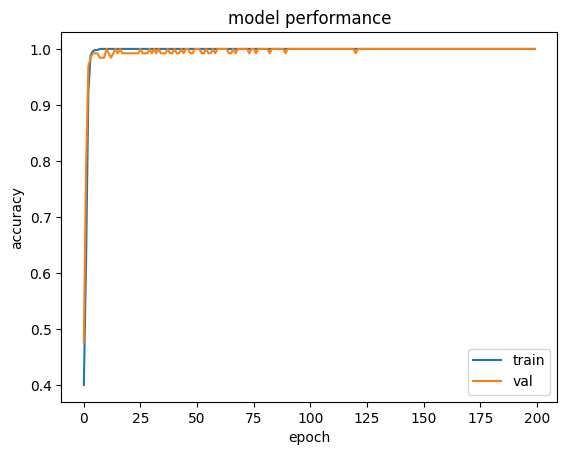

In [ ]:
# summarize history for accuracy

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


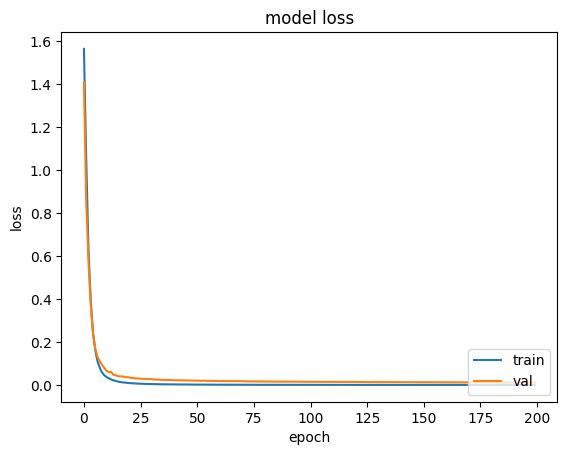

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Train a machine learning model to classify cancer cases
model = LogisticRegression()
model.fit(X, y)

# Use the model to predict the probability of cancer for each case
probabilities = model.predict_proba(X)

# Compute the average probability of cancer for all cases
average_probability = np.mean(probabilities[:, 1])

# Compute the cancer percentage based on the average probability
cancer_percentage = average_probability * 100

print(f"Cancer percentage: {cancer_percentage:.2f}%")

Cancer percentage: 9.74%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Split the dataset into features, labels, and cancer type
X = df.drop(['gene_4', 'Cancer_Type'], axis=1)
y = df['gene_4']
cancer_type = df['Cancer_Type']

# Ensure that X and X_train have the same number of features
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
assert X_train.shape[1] == X.shape[1]

# Remove feature names from X
X = X.values
X_train = X_train.values
X_val = X_val.values

# Convert y to a categorical variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Train a machine learning model to classify cancer cases for each cancer type
model = LogisticRegression()
model.fit(X_train, y_train)

# Use the model to predict the probability of cancer for each case
probabilities = model.predict_proba(X)

# Compute the average probability of cancer for each cancer type
average_probabilities = np.mean(probabilities, axis=0)

# Compute the cancer percentage for each cancer type
cancer_percentages = average_probabilities * 100

# Print the cancer percentage for each cancer type
for i, cancer in enumerate(cancer_type.unique()):
    print(f"Cancer type: {cancer}, Cancer percentage: {cancer_percentages[i]:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cancer type: KIRC, Cancer percentage: 0.89%
Cancer type: BRCA, Cancer percentage: 0.15%
Cancer type: COAD, Cancer percentage: 0.17%
Cancer type: LUAD, Cancer percentage: 0.20%
Cancer type: PRAD, Cancer percentage: 0.15%
